KMeans Clustering

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import csv
df_clean = pd.read_csv("cleaned_scaled.csv")
X = df_clean.drop("target", axis=1).values
y = df_clean["target"].values

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X) 

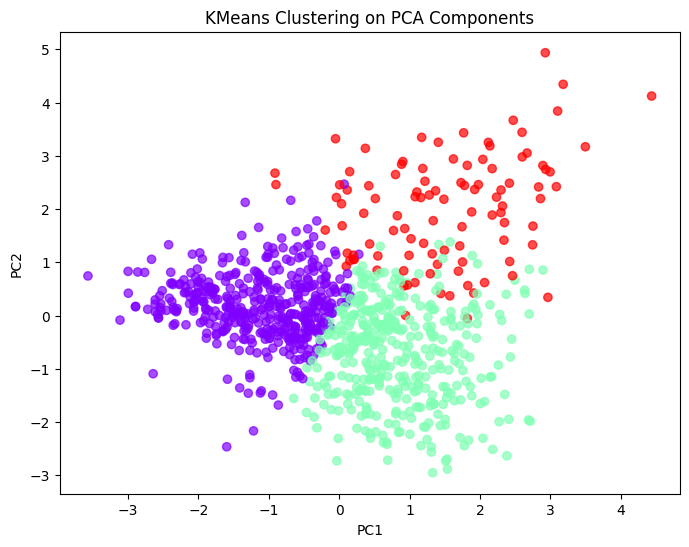

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='rainbow', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clustering on PCA Components")
plt.show()

Hierarchical Clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
X_unsup_df = df_clean.drop("target", axis=1)
X_unsup = X_unsup_df.values.astype(float)
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = agg.fit_predict(X_unsup)
df_hc = df_clean.copy()
df_hc["HC_cluster"] = labels

In [12]:
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X_unsup)

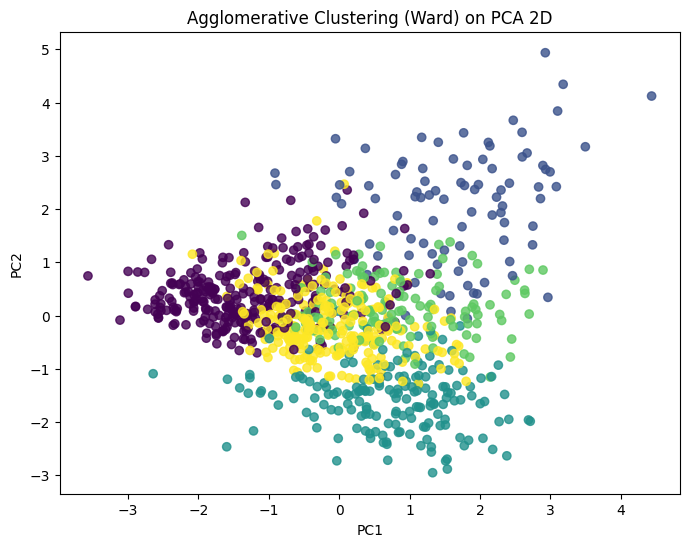

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X2[:, 0], X2[:, 1], c=labels, alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Agglomerative Clustering (Ward) on PCA 2D")
plt.show()